In [31]:
import numpy as np
import pandas as pd

otu_df = pd.read_csv('/home/esp/data_analyze/15.03.2024/data/init_data/Res1/OTU.txt', sep='\t')
hiera_blast = pd.read_csv('/home/esp/data_analyze/15.03.2024/data/init_data/Res1/hiera_BLAST.txt', sep='\t')
meta_map_init = pd.read_csv('/home/esp/data_analyze/15.03.2024/data/init_data/Res1/primary/in.map', sep='\t')
meta = pd.read_csv('/home/esp/data_analyze/15.03.2024/data/init_data/Res1/metadata_geo.csv',  sep='\t')
genus_df = pd.read_csv('/home/esp/data_analyze/15.03.2024/data/init_data/Res1/higherLvl/Genus.txt', sep='\t')

In [32]:
meta_map_df = meta_map_init.copy()
meta_map_df = meta_map_df.drop(columns=['SequencingRun'])
for column in meta_map_df.select_dtypes(include=['object']):  
    meta_map_df[column] = meta_map_df[column].str.replace('.extendedFrags.fastq.gz', '', regex=False)

meta_map_df['fastqFile'] = meta_map_df['fastqFile'].apply(lambda x: x.split('_')[0])
meta_map_df = meta_map_df.rename(columns={'fastqFile':'ID'})
meta_map_df['ID'] = pd.to_numeric(meta_map_df['ID'], errors='coerce')
meta_map_df.head()

,#SampleID,ID
0,SMPL0,10.0
1,SMPL1,12.0
2,SMPL10,66.0
3,SMPL100,12161.0
4,SMPL101,12162.0


In [33]:
matching_values = meta_map_df['ID'].isin(meta['ID'])
matched_values = meta_map_df['ID'][matching_values]

unique_in_meta_map_df = meta_map_df[~meta_map_df['ID'].isin(meta['ID'])]['ID']

unique_in_meta = meta[~meta['ID'].isin(meta_map_df['ID'])]['ID']

file = 'data/output_data/uniq_data.csv'
with open(file, 'w') as uniq_data_file:
    uniq_data_file.write(f"Совпадающие значения в обоих DataFrame ({len(matched_values.unique())}): {matched_values.unique()}\n\n"
                         f"Уникальные значения в in.map ({len(unique_in_meta_map_df.unique())}): {unique_in_meta_map_df.unique()}\n\n"
                         f"Уникальные значения в metadata ({len(unique_in_meta.unique())}): {unique_in_meta.unique()}\n\n"
                         f"Общее кол-во пропущенных данных: {len(unique_in_meta_map_df.unique()) + len(unique_in_meta.unique())}")



In [34]:
merged_df = pd.merge(meta_map_df, meta, on='ID')

final_meta_df = merged_df[['#SampleID', 'ID','GROUP']]
final_meta_df.head()

,#SampleID,ID,GROUP
0,SMPL100,12161.0,2
1,SMPL101,12162.0,2
2,SMPL102,12164.0,2
3,SMPL103,12172.0,2
4,SMPL104,12180.0,2


In [35]:
genus_df.head()

,Genus,SMPL0,SMPL1,SMPL10,SMPL100,SMPL101,SMPL102,SMPL103,SMPL104,SMPL105,...,SMPL90,SMPL91,SMPL92,SMPL93,SMPL94,SMPL95,SMPL96,SMPL97,SMPL98,SMPL99
0,Bacteria;?;?;?;?;?,2,11,2,2,135,726,1,2,32,...,90,0,3,0,4,1,440,86,990,783
1,Bacteria;Actinobacteria;Actinobacteria;Actinom...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bacteria;Actinobacteria;Actinobacteria;Actinom...,1,192,329,0,35,1,3,4,12,...,20,1,104,8,36,1,17,3,379,56
3,Bacteria;Actinobacteria;Actinobacteria;Actinom...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bacteria;Actinobacteria;Actinobacteria;Actinom...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
import pandas as pd

genus_df_transposed = genus_df.T.reset_index()

genus_df_transposed.columns = ['#SampleID'] + list(genus_df['Genus'])

genus_df_transposed = genus_df_transposed.drop(genus_df_transposed.index[0])

merged_genus_df = pd.merge(final_meta_df, genus_df_transposed, on='#SampleID', how='left')
merged_genus_df = merged_genus_df.drop(columns=['ID'])

merged_genus_df.to_csv('def.csv', sep='\t')
merged_genus_df.head()

,#SampleID,GROUP,Bacteria;?;?;?;?;?,Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;?;?,Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;Actinomycetaceae;Actinomyces,Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;Corynebacteriaceae;Corynebacterium,Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;Micrococcaceae;Micrococcus,Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;Propionibacteriaceae;?,Bacteria;Actinobacteriota;?;?;?;?,Bacteria;Actinobacteriota;Acidimicrobiia;Microtrichales;?;?,...,Bacteria;TM7;TM7-3;I025;Rs-045;[Saccharibacteria],Bacteria;Tenericutes;Mollicutes;Mycoplasmatales;Mycoplasmataceae;Mycoplasma,Bacteria;Verrucomicrobiota;Lentisphaeria;Victivallales;Victivallaceae;Victivallis,Bacteria;Verrucomicrobiota;Lentisphaeria;Victivallales;vadinBE97;uncultured rumen bacterium,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Verrucomicrobiales;Akkermansiaceae;Akkermansia,Bacteria;WPS-2;?;?;?;?,Eukaryota;Ascomycota;Saccharomycetes;Saccharomycetales;Debaryomycetaceae;Candida-Lodderomyces clade,Eukaryota;Phragmoplastophyta;Embryophyta;?;?;?,Eukaryota;Vertebrata;Mammalia;?;?;?,noHit;
0,SMPL100,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,599
1,SMPL101,2,135,0,35,0,0,0,540,0,...,0,0,0,0,0,0,0,0,0,3226
2,SMPL102,2,726,0,1,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,3783
3,SMPL103,2,1,0,3,0,0,0,6,0,...,0,0,0,0,0,0,0,0,0,1871
4,SMPL104,2,2,0,4,0,0,0,121,0,...,0,0,0,0,0,0,0,0,0,337


In [37]:
replace_dict = {
    1: "AstNIS",
    2: "AstReg",
    3: "KokNis",
    4: "KokReg",
    5: "SemNis",
    6: "SemReg",
    7: "UstNis",
    8: "UstReg",
    9: "KarNis",
    10: "KarReg"
}

merged_genus_df['GROUP'] = merged_genus_df['GROUP'].replace(replace_dict)
merged_genus_df.head()

,#SampleID,GROUP,Bacteria;?;?;?;?;?,Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;?;?,Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;Actinomycetaceae;Actinomyces,Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;Corynebacteriaceae;Corynebacterium,Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;Micrococcaceae;Micrococcus,Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;Propionibacteriaceae;?,Bacteria;Actinobacteriota;?;?;?;?,Bacteria;Actinobacteriota;Acidimicrobiia;Microtrichales;?;?,...,Bacteria;TM7;TM7-3;I025;Rs-045;[Saccharibacteria],Bacteria;Tenericutes;Mollicutes;Mycoplasmatales;Mycoplasmataceae;Mycoplasma,Bacteria;Verrucomicrobiota;Lentisphaeria;Victivallales;Victivallaceae;Victivallis,Bacteria;Verrucomicrobiota;Lentisphaeria;Victivallales;vadinBE97;uncultured rumen bacterium,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Verrucomicrobiales;Akkermansiaceae;Akkermansia,Bacteria;WPS-2;?;?;?;?,Eukaryota;Ascomycota;Saccharomycetes;Saccharomycetales;Debaryomycetaceae;Candida-Lodderomyces clade,Eukaryota;Phragmoplastophyta;Embryophyta;?;?;?,Eukaryota;Vertebrata;Mammalia;?;?;?,noHit;
0,SMPL100,AstReg,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,599
1,SMPL101,AstReg,135,0,35,0,0,0,540,0,...,0,0,0,0,0,0,0,0,0,3226
2,SMPL102,AstReg,726,0,1,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,3783
3,SMPL103,AstReg,1,0,3,0,0,0,6,0,...,0,0,0,0,0,0,0,0,0,1871
4,SMPL104,AstReg,2,0,4,0,0,0,121,0,...,0,0,0,0,0,0,0,0,0,337


In [38]:
uniq_group = merged_genus_df['GROUP'].unique()
file = 'data/output_data/uniq_data.csv'
with open(file, 'a', buffering=1) as uniq_data_file:
    uniq_data_file.write(f"\n\nГруппы, оставшиеся после объединения данных({len(uniq_group)}): {uniq_group}\n\n")

In [39]:
import pandas as pd

numerical_columns = merged_genus_df.select_dtypes(include=['number']).columns

Q1 = merged_genus_df[numerical_columns].quantile(0.25)
Q3 = merged_genus_df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_indices = ~((merged_genus_df[numerical_columns] < lower_bound) | (merged_genus_df[numerical_columns] > upper_bound)).any(axis=1)
iqr_merged_df = merged_genus_df[filtered_indices]

iqr_merged_df.head()

,#SampleID,GROUP,Bacteria;?;?;?;?;?,Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;?;?,Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;Actinomycetaceae;Actinomyces,Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;Corynebacteriaceae;Corynebacterium,Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;Micrococcaceae;Micrococcus,Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;Propionibacteriaceae;?,Bacteria;Actinobacteriota;?;?;?;?,Bacteria;Actinobacteriota;Acidimicrobiia;Microtrichales;?;?,...,Bacteria;TM7;TM7-3;I025;Rs-045;[Saccharibacteria],Bacteria;Tenericutes;Mollicutes;Mycoplasmatales;Mycoplasmataceae;Mycoplasma,Bacteria;Verrucomicrobiota;Lentisphaeria;Victivallales;Victivallaceae;Victivallis,Bacteria;Verrucomicrobiota;Lentisphaeria;Victivallales;vadinBE97;uncultured rumen bacterium,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Verrucomicrobiales;Akkermansiaceae;Akkermansia,Bacteria;WPS-2;?;?;?;?,Eukaryota;Ascomycota;Saccharomycetes;Saccharomycetales;Debaryomycetaceae;Candida-Lodderomyces clade,Eukaryota;Phragmoplastophyta;Embryophyta;?;?;?,Eukaryota;Vertebrata;Mammalia;?;?;?,noHit;
0,SMPL100,AstReg,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,599
1,SMPL101,AstReg,135,0,35,0,0,0,540,0,...,0,0,0,0,0,0,0,0,0,3226
2,SMPL102,AstReg,726,0,1,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,3783
3,SMPL103,AstReg,1,0,3,0,0,0,6,0,...,0,0,0,0,0,0,0,0,0,1871
4,SMPL104,AstReg,2,0,4,0,0,0,121,0,...,0,0,0,0,0,0,0,0,0,337


In [43]:
from skbio.diversity import alpha_diversity
from skbio.diversity import alpha
import pandas as pd


data = iqr_merged_df.drop(columns=['#SampleID', 'GROUP']).fillna(0).values
ids = iqr_merged_df['#SampleID'].values
groups = iqr_merged_df['GROUP'].values

shannon_diversity = alpha_diversity('shannon', data, ids)
simpson_diversity = alpha_diversity('simpson', data, ids)
observed_otus = alpha_diversity('observed_otus', data, ids)
chao1 = alpha_diversity('chao1', data, ids)
alpha_diversity_df = pd.DataFrame({
    'SAMPLE ID': ids,
    'GROUP': groups,
    'shannon': shannon_diversity,
    'simpson': simpson_diversity,
    'observed': observed_otus,
    'chao1': chao1
})

alpha_diversity_df = alpha_diversity_df.reset_index().drop(columns='index') 
alpha_diversity_df.to_csv('data/output_data/alpha/alpha_general.csv', sep='\t')
alpha_diversity_df.head()


/tmp/ipykernel_6366/1786933284.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = iqr_merged_df.drop(columns=['#SampleID', 'GROUP']).fillna(0).values


,SAMPLE ID,GROUP,shannon,simpson,observed,chao1
0,SMPL100,AstReg,2.099733,0.630825,24,29.250000
1,SMPL101,AstReg,2.212189,0.590268,96,124.111111
2,SMPL102,AstReg,1.529867,0.374218,81,98.000000
3,SMPL103,AstReg,1.027095,0.321014,50,67.500000
4,SMPL104,AstReg,2.098039,0.489402,71,74.928571


In [44]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

def p_value_alpha(alpha_diversity_df, index):
    tukey_result = pairwise_tukeyhsd(endog=alpha_diversity_df[index], groups=alpha_diversity_df['GROUP'], alpha=0.05)
    tukey_summary_df = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])
    groups = alpha_diversity_df['GROUP'].unique()
    p_value_matrix = pd.DataFrame(index=groups, columns=groups, data=1.0)

    for i, row in tukey_summary_df.iterrows():
        group1 = row['group1']
        group2 = row['group2']
        p_value = row['p-adj']
        p_value_matrix.loc[group1, group2] = p_value
        p_value_matrix.loc[group2, group1] = p_value

    p_value_matrix.to_csv(f'data/output_data/alpha/p_value_{index}.csv', sep='\t')
    return p_value_matrix

p_value_shannon = p_value_alpha(alpha_diversity_df, 'shannon')
p_value_simpson = p_value_alpha(alpha_diversity_df, 'simpson')
p_value_observed = p_value_alpha(alpha_diversity_df, 'observed')
p_value_chao1 = p_value_alpha(alpha_diversity_df, 'chao1')


In [54]:
p_value_shannon

,AstReg,KokReg,SemReg,UstNis,UstReg
AstReg,1.0000,0.0002,0.9995,0.3781,0.9939
KokReg,0.0002,1.0000,0.0097,0.3809,0.0061
SemReg,0.9995,0.0097,1.0000,0.6625,0.9840
UstNis,0.3781,0.3809,0.6625,1.0000,0.4181
UstReg,0.9939,0.0061,0.9840,0.4181,1.0000


In [46]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

anova_results = ols('shannon ~ GROUP', data=alpha_diversity_df).fit()
anova_table = sm.stats.anova_lm(anova_results, typ=2)

tukey = pairwise_tukeyhsd(endog=alpha_diversity_df['shannon'], groups=alpha_diversity_df['GROUP'], alpha=0.05)

tukey_results_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
tukey_results_df.to_csv(f'data/output_data/alpha/alpha_stats_tukey.csv', sep='\t')

/tmp/ipykernel_6366/4039766440.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GROUP', y=alpha_index, data=alpha_diversity_df, palette=palette, width=0.4)
/tmp/ipykernel_6366/4039766440.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GROUP', y=alpha_index, data=alpha_diversity_df, palette=palette, width=0.4)
/tmp/ipykernel_6366/4039766440.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GROUP', y=alpha_index, data=alpha_diversity_df, palette=palette, width=0.4)
/tmp/ipykernel_6366/4039766440.py:8: FutureWarning: 

Passing

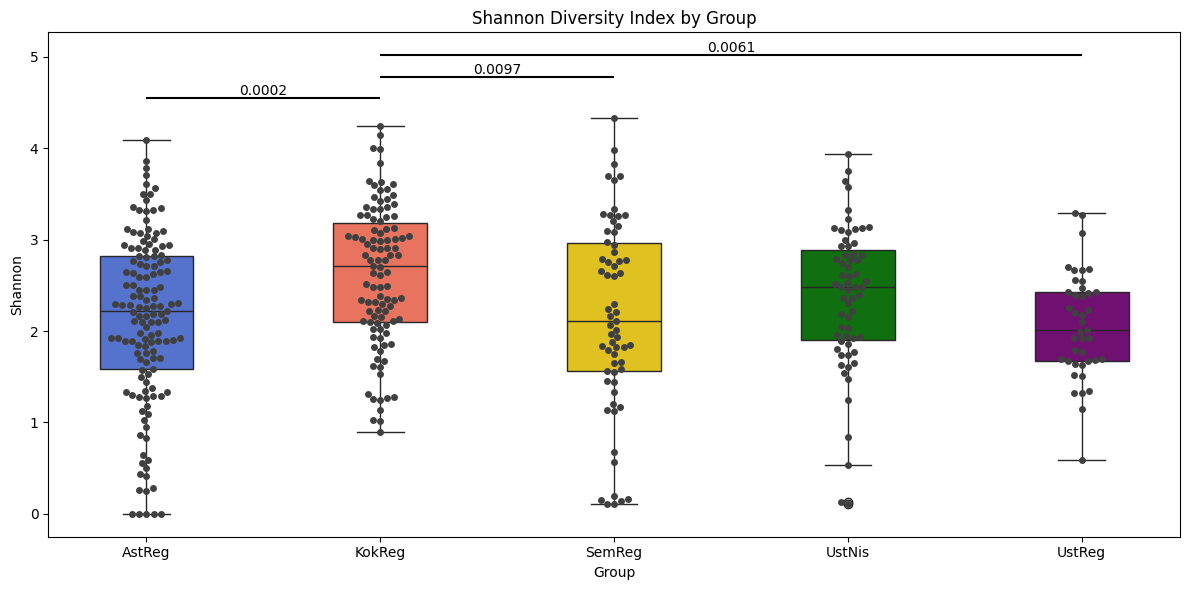

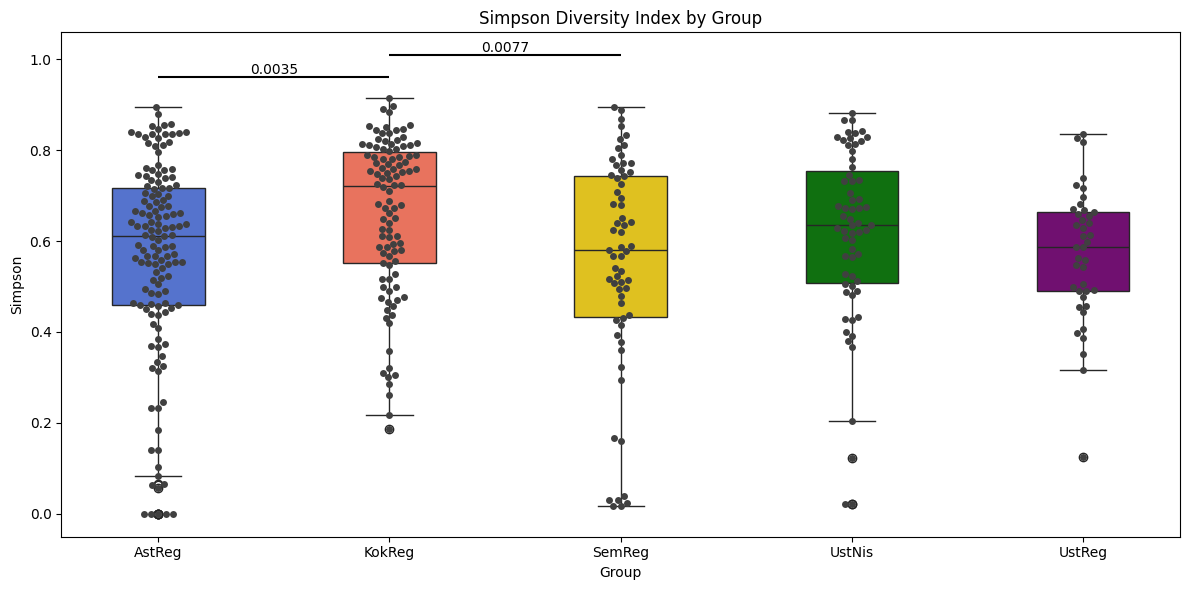

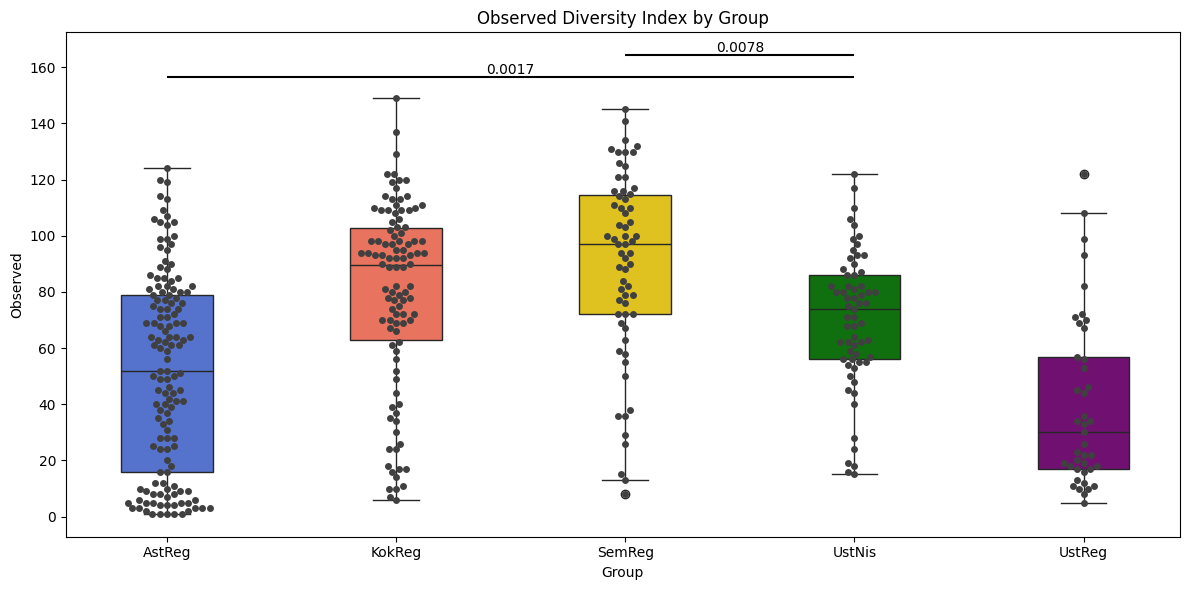

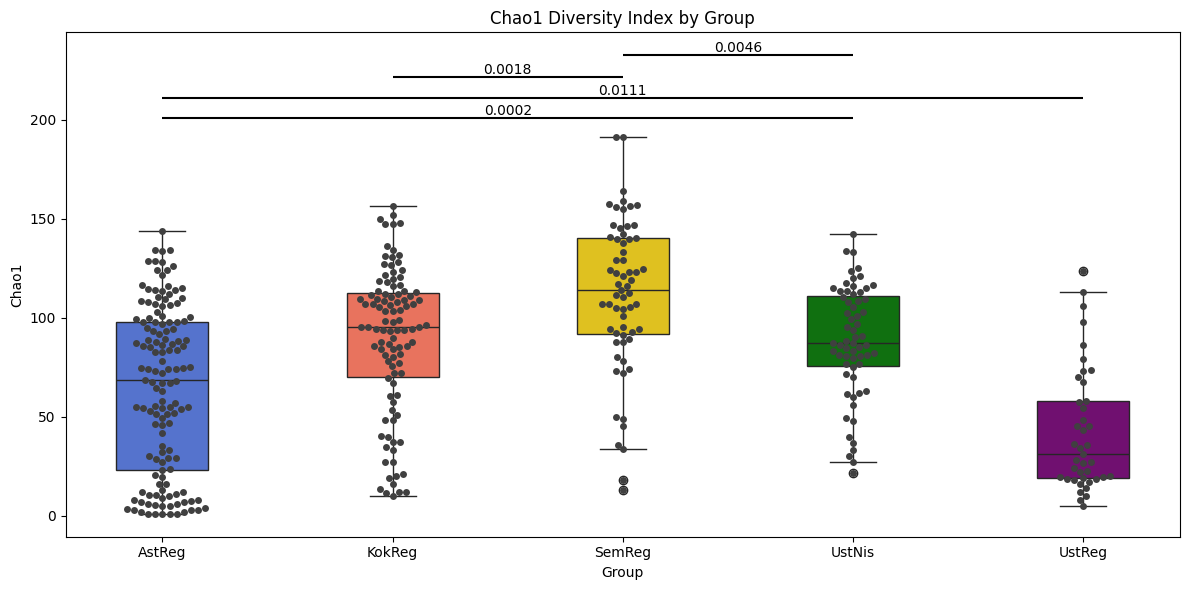

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

def alpha_boxplot(alpha_diversity_df, p_value, alpha_index):

    palette = {"AstReg": "royalblue", "KokReg": "tomato", "SemReg": "gold", "UstNis": "green", "UstReg": "purple"}
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='GROUP', y=alpha_index, data=alpha_diversity_df, palette=palette, width=0.4)
    sns.swarmplot(x='GROUP', y=alpha_index, data=alpha_diversity_df, color=".25")
    plt.title(f'{alpha_index.capitalize()} Diversity Index by Group')
    plt.xlabel('Group')
    plt.ylabel(alpha_index.capitalize())

    groups = alpha_diversity_df['GROUP'].unique()
    group_combinations = [(groups[i], groups[j]) for i in range(len(groups)) for j in range(i+1, len(groups))]
    y_max = alpha_diversity_df[alpha_index].max()

    for group1, group2 in group_combinations:
        p_val = p_value.loc[group1, group2]
        if p_val < 0.05 and p_val != 0:
            y = y_max * 1.05
            x1 = list(palette.keys()).index(group1)
            x2 = list(palette.keys()).index(group2)
            plt.hlines(y, x1, x2, color='black')
            plt.text((x1+x2)*.5, y, f"{p_val:.4f}", ha='center', va='bottom', color='black')
            y_max = y

    plt.tight_layout()
    plt.savefig(f'/home/esp/data_analyze/15.03.2024/figures/alpha_diversity/{alpha_index}.pdf', bbox_inches = 'tight')
    # plt.show()


alpha_boxplot(alpha_diversity_df, p_value_shannon, 'shannon')
alpha_boxplot(alpha_diversity_df, p_value_simpson, 'simpson')
alpha_boxplot(alpha_diversity_df, p_value_observed, 'observed')
alpha_boxplot(alpha_diversity_df, p_value_chao1, 'chao1')


### Beta diversity

In [76]:
from skbio.diversity import beta_diversity
import pandas as pd

data = iqr_merged_df.drop(columns=['#SampleID', 'GROUP']).apply(pd.to_numeric, errors='coerce').fillna(0).values
ids = iqr_merged_df['#SampleID'].values

bc_dm = beta_diversity('braycurtis', data, ids)

bc_df = pd.DataFrame(bc_dm.data, index=ids, columns=ids)

bc_df.head()


,SMPL100,SMPL101,SMPL102,SMPL103,SMPL104,SMPL105,SMPL106,SMPL107,SMPL108,SMPL109,...,SMPL90,SMPL91,SMPL92,SMPL93,SMPL94,SMPL95,SMPL96,SMPL97,SMPL98,SMPL99
SMPL100,0.000000,0.988188,0.986152,0.962012,0.873215,0.800353,0.942970,0.471856,0.775474,0.730738,...,0.978692,0.660886,0.933917,0.788477,0.892050,0.369325,0.982145,0.826873,0.935256,0.986192
SMPL101,0.988188,0.000000,0.186465,0.970943,0.887098,0.954969,0.759665,0.994011,0.969338,0.972608,...,0.692181,0.978691,0.743358,0.930618,0.841403,0.994314,0.288744,0.900566,0.766479,0.287684
SMPL102,0.986152,0.186465,0.000000,0.967630,0.875162,0.952509,0.728028,0.992971,0.972343,0.969820,...,0.714503,0.975097,0.720424,0.923143,0.827808,0.993434,0.275384,0.885310,0.755940,0.256887
SMPL103,0.962012,0.970943,0.967630,0.000000,0.950736,0.946692,0.945037,0.983019,0.951617,0.949611,...,0.878787,0.960528,0.948476,0.948241,0.941574,0.979787,0.962221,0.947735,0.940047,0.967711
SMPL104,0.873215,0.887098,0.875162,0.950736,0.000000,0.741764,0.552013,0.920013,0.761317,0.673108,...,0.813707,0.711857,0.501786,0.342581,0.303924,0.927808,0.850113,0.317237,0.530711,0.871053


In [80]:
long_format_df = pd.melt(iqr_merged_df, 
                         id_vars=['#SampleID', 'GROUP'], 
                         var_name='Taxonomy', 
                         value_name='Value')

long_format_df['OTU'] = 'ASV' + (long_format_df.index + 1).astype(str).str.zfill(4)
long_format_df = long_format_df[['OTU', 'Taxonomy', '#SampleID', 'GROUP', 'Value']]
long_format_df.head()


,OTU,Taxonomy,#SampleID,GROUP,Value
0,ASV0001,Bacteria;?;?;?;?;?,SMPL100,AstReg,2
1,ASV0002,Bacteria;?;?;?;?;?,SMPL101,AstReg,135
2,ASV0003,Bacteria;?;?;?;?;?,SMPL102,AstReg,726
3,ASV0004,Bacteria;?;?;?;?;?,SMPL103,AstReg,1
4,ASV0005,Bacteria;?;?;?;?;?,SMPL104,AstReg,2


In [102]:
import pandas as pd
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa
from skbio.stats.distance import permanova, anosim
from scipy.spatial.distance import pdist, squareform
from matplotlib.patches import Ellipse
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def beta_diversity_vizualiztion(long_format_df, beta_diversity_method = "braycurtis"):

    data_pivot = long_format_df.pivot_table(index='#SampleID', columns='Taxonomy', values='Value', fill_value=0)
    samples = data_pivot.index.tolist()
    group_labels = long_format_df.drop_duplicates(subset=['#SampleID']).set_index('#SampleID')['GROUP']

    dm = beta_diversity(beta_diversity_method, data_pivot.values, ids=samples)

    pcoa_results = pcoa(dm)

    pcoa_df = pcoa_results.samples
    pcoa_df['GROUP'] = group_labels.values

    def draw_ellipse(position, covariance, ax=None, **kwargs):
        ax = ax or plt.gca()
        if covariance.shape == (2, 2):
            U, s, Vt = np.linalg.svd(covariance)
            angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
            width, height = 2 * np.sqrt(s)
        else:
            angle = 0
            width = height = 2 * np.sqrt(covariance)
        
        for nsig in range(1, 2):
            ell = Ellipse(xy=position, width=nsig * width, height=nsig * height, angle=angle, **kwargs)
            ax.add_patch(ell)

    permanova_results = permanova(dm, group_labels)
    anosim_results = anosim(dm, group_labels)

    with open(f'data/output_data/beta_diversity/{beta_diversity_method}_stats.txt', 'w') as file:
        file.write(f'{beta_diversity_method} PERMANOVA results: \n{permanova_results}\n\n'
                   f'{beta_diversity_method} ANOSIM results: \n{anosim_results}')

    plt.figure(figsize=(12, 9))
    sns.scatterplot(x='PC1', y='PC2', hue='GROUP', data=pcoa_df, s=100, alpha=0.75, palette="Set1", edgecolor="black", linewidth=0.5)
    for label, group_df in pcoa_df.groupby("GROUP"):
        color = sns.color_palette("Set1")[list(pcoa_df['GROUP'].unique()).index(label)]
        draw_ellipse(group_df[["PC1", "PC2"]].mean(), group_df[["PC1", "PC2"]].cov(), alpha=0.25, facecolor=color)

    anosim_text = f"ANOSIM R = {anosim_results['test statistic']:.3f}, p-value = {anosim_results['p-value']:.3f}"
    permanova_text = f"PERMANOVA R = {permanova_results['test statistic']:.3f}, p-value = {permanova_results['p-value']:.3f}"

    plt.text(.94, 0.032, anosim_text, ha="right", va="bottom", transform=plt.gca().transAxes, fontsize=14)
    plt.text(.94, 0.002, permanova_text, ha="right", va="bottom", transform=plt.gca().transAxes, fontsize=14)

    plt.title(f"Beta Diversity - PCoA plot with {beta_diversity_method} dissimilarity", fontsize=18)
    plt.xlabel(f"PC1 ({pcoa_results.proportion_explained.iloc[0]:.2%} explained)", fontsize=14)
    plt.ylabel(f"PC2 ({pcoa_results.proportion_explained.iloc[1]:.2%} explained)", fontsize=14)
    plt.axhline(0, color='grey', linestyle='--')
    plt.axvline(0, color='grey', linestyle='--')
    plt.grid(True, which="both", ls="--", linewidth=0.5)
    plt.legend(title='GROUP', fontsize=12, title_fontsize=12)
    plt.tight_layout()
    plt.savefig(f'data/output_data/beta_diversity/{beta_diversity_method}_anosim_permanova.pdf', bbox_inches='tight')
    plt.show()

# beta_diversity_vizualiztion(long_format_df, 'braycurtis')
# beta_diversity_vizualiztion(long_format_df, 'jaccard')
# beta_diversity_vizualiztion(long_format_df, 'euclidean')
# beta_diversity_vizualiztion(long_format_df, 'canberra')
# beta_diversity_vizualiztion(long_format_df, 'cosine')

In [108]:
data_pivot = long_format_df.pivot_table(index='#SampleID', columns='Taxonomy', values='Value', fill_value=0)
samples = data_pivot.index.tolist()
group_labels = long_format_df.drop_duplicates(subset=['#SampleID']).set_index('#SampleID')['GROUP']
relative_abundance = data_pivot.div(data_pivot.sum(axis=1), axis=0)
group_labels.unique()

/tmp/ipykernel_6366/1529671704.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_pivot = long_format_df.pivot_table(index='#SampleID', columns='Taxonomy', values='Value', fill_value=0)


array(['AstReg', 'KokReg', 'SemReg', 'UstNis', 'UstReg'], dtype=object)

In [112]:
from scipy.stats import kruskal
import pandas as pd
import os

# Допустим, relative_abundance и group_labels уже определены

# Для каждого таксона (колонки в DataFrame) проведем тест Краскела-Уоллиса
kruskal_results = {}

for taxon in relative_abundance.columns:
    # Создаем список Series, каждый из которых соответствует относительному изобилию таксона для группы
    samples = [relative_abundance.loc[group_labels == group, taxon] for group in group_labels.unique()]
    # Проверяем, есть ли хоть одно ненулевое значение в каждой группе для данного таксона
    if all(sample.sum() > 0 for sample in samples):  # Исправленная проверка
        statistic, p_value = kruskal(*samples)
        kruskal_results[taxon] = p_value

# Фильтруем результаты, чтобы оставить только те, где p-value < 0.05
significant_taxa = {taxon: p for taxon, p in kruskal_results.items() if p < 0.05}

# Указываем корректный путь к файлу
output_file_path = "data/output_data/relative_abundance/significant_taxa_p_values.txt"

# Создаем директорию, если она не существует
os.makedirs(os.path.dirname(output_file_path), exist_ok=True)

# Запись значимых p-value в файл
with open(output_file_path, "w") as file:
    for taxon, p_value in significant_taxa.items():
        file.write(f"{taxon}: p-value = {p_value:.5f}\n")
p_value

5.578364780645247e-17